Exercise 1 

Origial Image

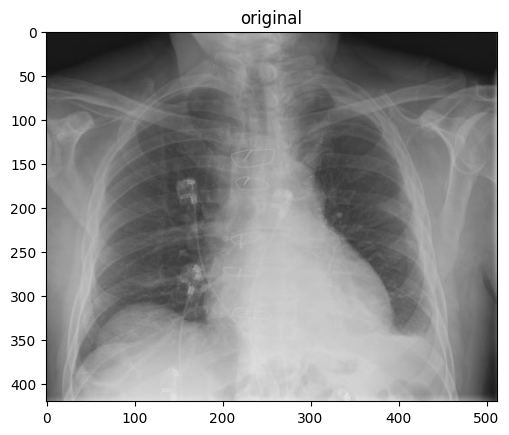

In [201]:
import cv2 as cv
import matplotlib.pyplot as plt
img = cv.imread("Chest_M1.jpg")

imgs = [img]
titles = ['original']

plt.title(titles[0])
plt.imshow(imgs[0])


Negative Image

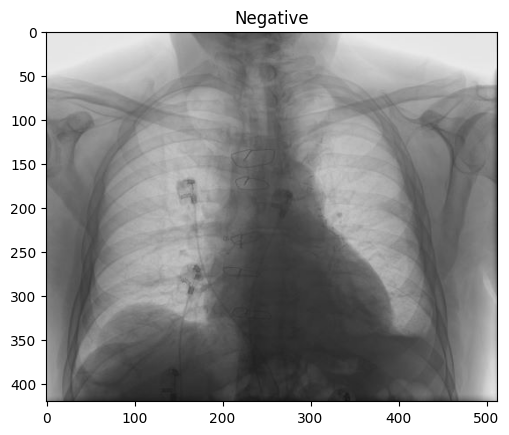

In [202]:
imgNeg = abs(255-img)

imgs.append(imgNeg)
titles.append("Negative")

plt.title(titles[1])
plt.imshow(imgs[1])

Increase brightness

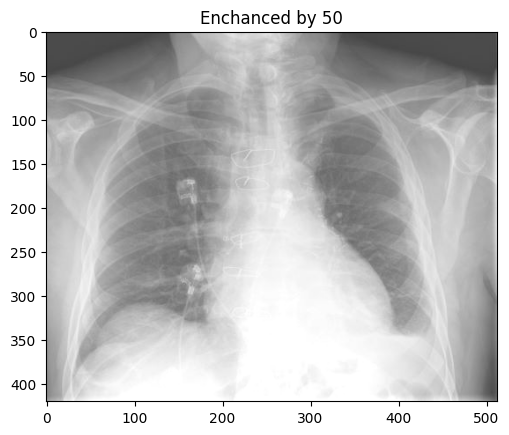

In [203]:
brightness = 50
imgInc = cv.convertScaleAbs(img, beta=brightness)

imgs.append(imgInc)
titles.append("Enchanced by 50")

plt.title(titles[-1])
plt.imshow(imgs[-1])

Decrease brightness

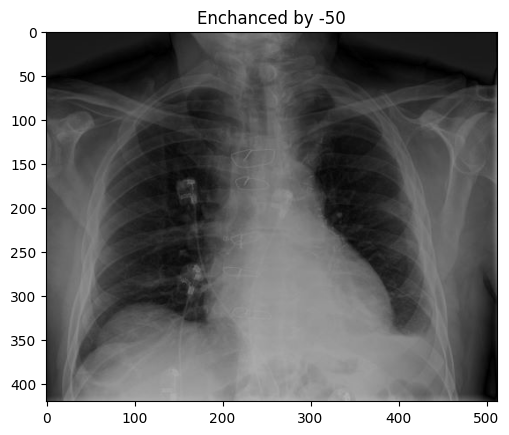

In [204]:
brightness = -50
imgDec = cv.convertScaleAbs(img, beta=brightness)

imgs.append(imgDec)
titles.append("Enchanced by -50")

plt.title(titles[-1])
plt.imshow(imgs[-1])

Increase Contrast

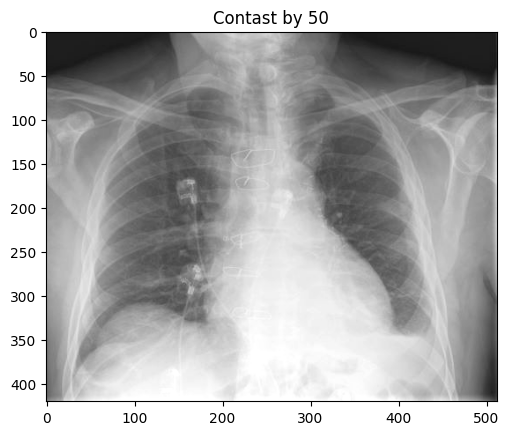

In [205]:
contrast = 1.2
imgConInc = cv.convertScaleAbs(img, alpha=contrast)

imgs.append(imgConInc)
titles.append("Contast by 50")

plt.title(titles[-1])
plt.imshow(imgs[-1])

Decrease contast

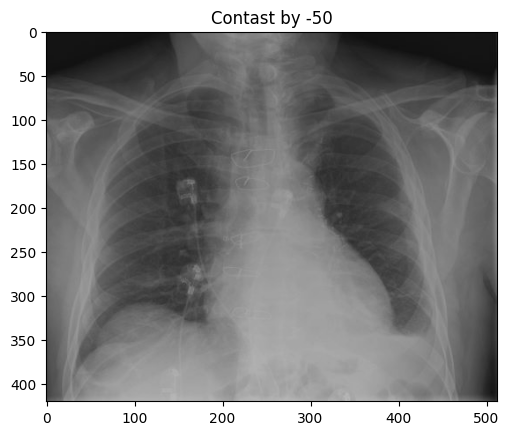

In [206]:
contrast = .8
imgConInc = cv.convertScaleAbs(img, alpha=contrast)

imgs.append(imgConInc)
titles.append("Contast by -50")

plt.title(titles[-1])
plt.imshow(imgs[-1])

Exercise 2

Original Image

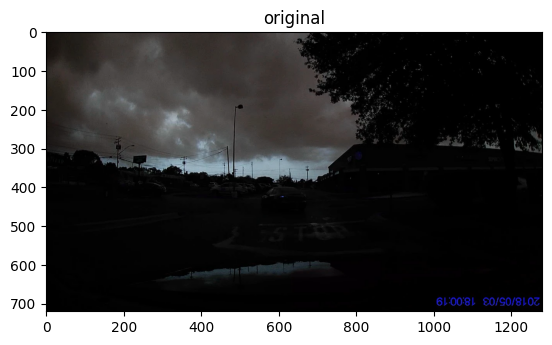

In [207]:
import numpy as np
img2 = cv.imread("exposer.png")

imgs = [img2]
titles = ["original"]

plt.title(titles[-1])
plt.imshow(imgs[-1])

Gamma correction

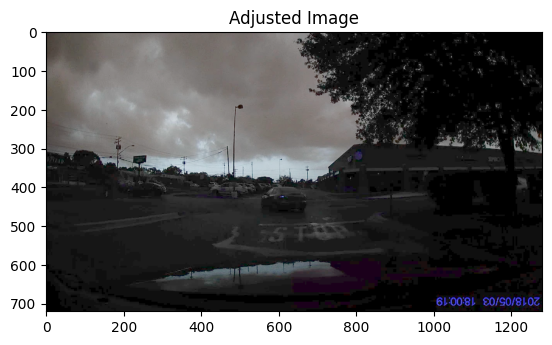

In [268]:

def gammaCorrection(src, gamma):
    invGamma = 1 / gamma

    table = [((i / 255) ** invGamma) * 255 for i in range(256)]
    table = np.array(table, np.uint8)

    return cv.LUT(src, table)

imgGamma = gammaCorrection(img2, 2)
imgs.append(imgGamma)
titles.append("Adjusted Image")

plt.title(titles[-1])
plt.imshow(imgs[-1])


Histogram Eqaulization image

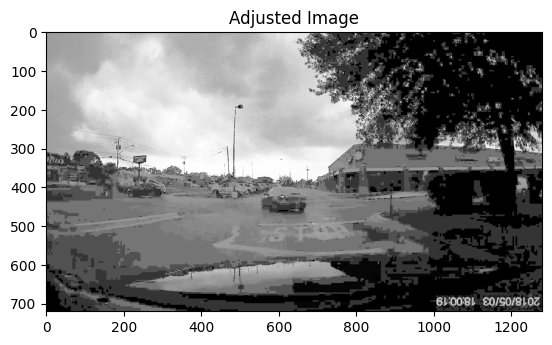

In [209]:
image = cv.cvtColor(imgGamma, cv.COLOR_BGR2GRAY)

imgEq = cv.equalizeHist(image)

imgs.append(imgEq)
titles.append("Adjusted Image")

plt.title(titles[-1])
plt.imshow(imgs[-1], cmap="gray")

Histogram comparison

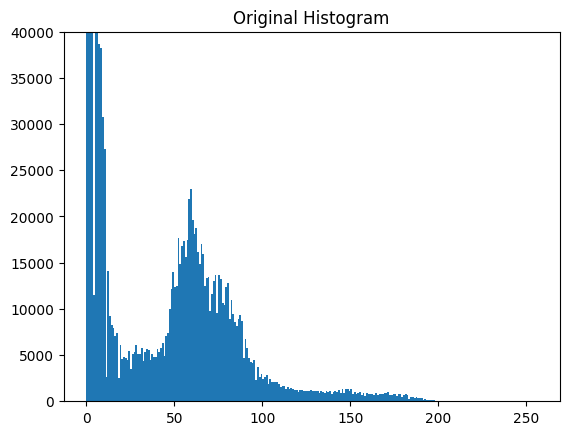

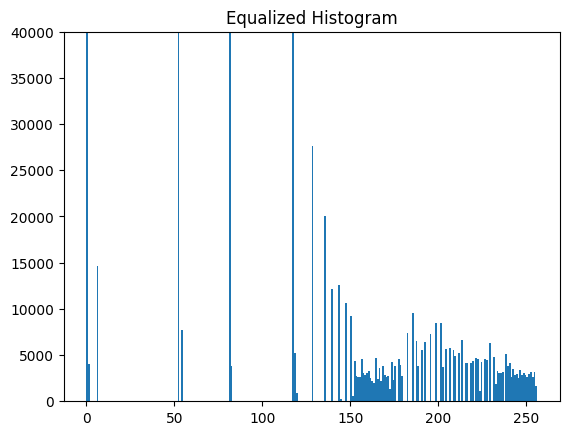

In [274]:
plt.hist(img2.ravel(), 256, [0, 256])
plt.title("Original Histogram")
plt.ylim(0, 40000)
plt.show()

plt.hist(imgEq.ravel(), 256, [0, 256])
plt.title("Equalized Histogram")
plt.ylim(0, 40000)
plt.show()



Exercise 3

Original Image

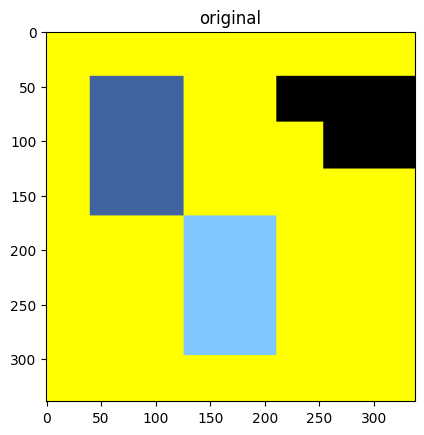

In [242]:
img3 = cv.imread("conncomp_rgb.png", cv.IMREAD_COLOR)

imgs = [img3]
titles = ["original"]

plt.title(titles[-1])
plt.imshow(imgs[-1])

GrayScale Image

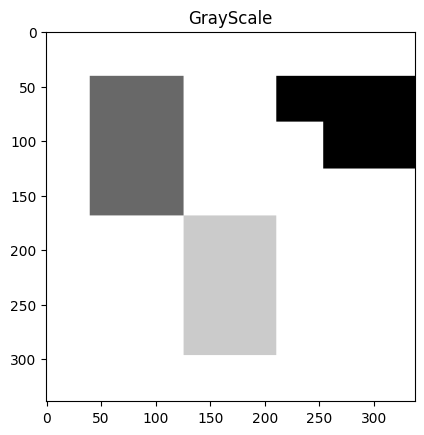

In [243]:
from skimage.color import rgb2gray
imgGray = rgb2gray(img3)

imgs.append(imgGray)
titles = ["GrayScale"]

plt.title(titles[-1])
plt.imshow(imgs[-1], cmap='gray')

Connected Components

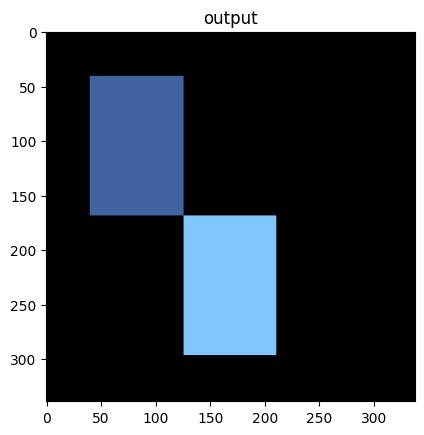

In [253]:
import pandas as pd
import matplotlib.pyplot as plt
from skimage.measure import label, regionprops, regionprops_table

binary = imgGray < 0.75

label_im = label(binary, connectivity=1)
regions = regionprops(label_im)

properties = ['area','convex_area','bbox_area', 'extent',  
              'mean_intensity', 'solidity', 'eccentricity', 
              'orientation']
pd.DataFrame(regionprops_table(label_im, imgGray, 
             properties=properties))

masks = []
bbox = []
list_of_index = []
for num, x in enumerate(regions):
    area = x.area
    convex_area = x.convex_area
    if ((area > 100)):
        masks.append(regions[num].convex_image)
        bbox.append(regions[num].bbox)   
        list_of_index.append(num)
count = len(masks)

for box, mask in zip(bbox, masks):
    red  =  img3[:,:,0][box[0]:box[2], box[1]:box[3]] * mask
    green = img3[:,:,1][box[0]:box[2], box[1]:box[3]] * mask
    blue  = img3[:,:,2][box[0]:box[2], box[1]:box[3]] * mask

rgb_mask = np.zeros_like(label_im)
for x in list_of_index:
    rgb_mask += (label_im==x+1).astype(int)
red  =  img3[:,:,0] * rgb_mask
green = img3[:,:,1] * rgb_mask
blue  = img3[:,:,2] * rgb_mask
image = np.dstack([red, green, blue])

imgs.append(image)
titles = ["output"]

plt.title(titles[-1])
plt.imshow(imgs[-1], cmap='gray')

#although you see only 2 regions, there are 3 regions but the third is black as well (see original pic)
#to see all 3 regions, please change the equality symbol to > on line 5
    #please change the equality symbol back to < before moving on to the next section


Bar plot of area sizes

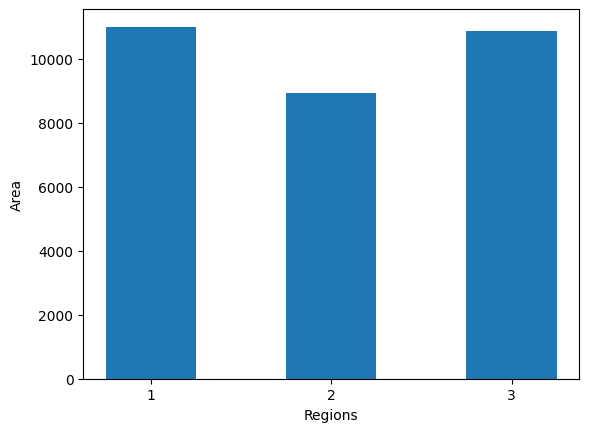

In [258]:
region = []
values = []
for num, x in enumerate(regions):
    region.append(str(num+1))
    values.append(x.area)

plt.bar(region, values, width=0.5)
plt.xlabel("Regions")
plt.ylabel("Area")
plt.show()

Area size percentage

In [265]:
height, width = image.shape[:2]
totalPixels = height*width

percentages = []
for num, x in enumerate(regions):
    percentage = x.area/totalPixels
    print("Region ", num+1, ":", '{0:.2g}'.format(percentage), "%")

Region  1 : 0.096 %
Region  2 : 0.078 %
Region  3 : 0.095 %
